In [1]:
import pandas as pd

data = pd.read_excel('2200282406.xlsx', skiprows=4)

data = pd.read_excel('2200282406.xlsx', header=4)

data = data.iloc[4:]

data.rename(columns={"Unnamed: 1": "Strana"})
print(data.head(3))

   Unnamed: 0       Unnamed: 1 Hl.m. Praha  Středo-český  Jiho-český  \
4         4.0           Mourek         14.          16.0        20.0   
5         5.0             LŽPL   19. - 20.          15.0        14.0   
6         6.0  PRO2022+SVPROZS         11.           9.0         9.0   

   Plzeň-ský Karlo-varský  Ústecký   Liberec-ký  Králové-hradecký  \
4       21.0          22.      21.0        19.0              20.0   
5       14.0          14.      14.0        14.0              13.0   
6        8.0           8.       8.0         8.0               8.0   

   Pardu-bický  Vysočina  Jiho-moravský Olomouc-ký  Zlínský  Moravsko-slezský  \
4         17.0      21.0           21.0        22.     22.0              22.0   
5         14.0      13.0           14.0        13.     13.0              15.0   
6          8.0       9.0            8.0         8.      8.0               9.0   

     ČR  
4  18.0  
5  14.0  
6   8.0  


MERGE

In [2]:
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Location': ['LEFT', 'LEFT', 'BOTH', 'BOTH']
})

df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Location': ['BOTH', 'BOTH', 'RIGHT', 'RIGHT']
})

In [3]:
outer_join = pd.merge(df1, df2, on='ID', how='outer')
print(outer_join)

   ID Location_x Location_y
0   1       LEFT        NaN
1   2       LEFT        NaN
2   3       BOTH       BOTH
3   4       BOTH       BOTH
4   5        NaN      RIGHT
5   6        NaN      RIGHT


In [4]:
left_join = pd.merge(df1, df2, on='ID', how='left')
print(left_join)

   ID Location_x Location_y
0   1       LEFT        NaN
1   2       LEFT        NaN
2   3       BOTH       BOTH
3   4       BOTH       BOTH


In [5]:
right_join = pd.merge(df1, df2, on='ID', how='right')
print(right_join)

   ID Location_x Location_y
0   3       BOTH       BOTH
1   4       BOTH       BOTH
2   5        NaN      RIGHT
3   6        NaN      RIGHT


In [6]:
inner_join = pd.merge(df1, df2, on='ID', how='inner')
print(inner_join)

   ID Location_x Location_y
0   3       BOTH       BOTH
1   4       BOTH       BOTH


In [7]:
left_anti_join = df1[~df1['ID'].isin(df2['ID'])]
print(left_anti_join)

   ID Location
0   1     LEFT
1   2     LEFT


In [8]:
right_anti_join = df2[~df2['ID'].isin(df1['ID'])]
print(right_anti_join)

   ID Location
2   5    RIGHT
3   6    RIGHT


Spojení datasetů Sčítání lidu

In [9]:
vek = pd.read_csv("sldb2021_vek.csv")

vek = vek[ vek["uzemi_cis"] == 43 ]

vek_sum = vek.groupby("vek_txt")["hodnota"].sum()
print(vek_sum.head())

vek_txt
0 - 14 let       1691760
15 - 64 let      6684359
65 a více let    2148048
Name: hodnota, dtype: int64


In [10]:
vek_more = vek.groupby("vek_txt")["hodnota"].agg(['sum', 'mean'])
print(vek_more.head())

                   sum         mean
vek_txt                            
0 - 14 let     1691760   270.508475
15 - 64 let    6684359  1068.813399
65 a více let  2148048   343.467861


In [11]:
vek_filtered = vek.dropna()

vek_pomer = vek_filtered.groupby('uzemi_kod').agg(
    celkem=('hodnota', 'sum'),
    nad_65=('hodnota', lambda x: x[vek_filtered.loc[x.index, 'vek_txt'] == '65 a více let']),
)

vek_pomer['Poměr_důchodců'] = vek_pomer['nad_65'] / vek_pomer['celkem']

print(vek_pomer.head())

           celkem  nad_65  Poměr_důchodců
uzemi_kod                                
500011       1817     419        0.230600
500020       1195     284        0.237657
500046       1699     352        0.207181
500062       2020     398        0.197030
500071       1716     357        0.208042


In [12]:
vira = pd.read_csv("sldb2021_vira.csv")
vira_filtered = vira.dropna()
vira_filtered = vira_filtered[ vira_filtered['vira_txt'] != 'Neuvedeno' ]

vira_filtered = vira_filtered[ vira_filtered["uzemi_cis"] == 43 ]

vira_sum = vira_filtered.groupby('uzemi_kod').agg(
    celkem=('hodnota', 'sum'),
    nevěřící=('hodnota', lambda x: 
        x[(vira_filtered.loc[x.index, 'vira_txt'] == 'Bez náboženské víry') 
        | (vira_filtered.loc[x.index, 'vira_txt'] == 'Jedi') 
        | (vira_filtered.loc[x.index, 'vira_txt'] == 'ateismus')
        | (vira_filtered.loc[x.index, 'vira_txt'] == 'agnosticismus')
        | (vira_filtered.loc[x.index, 'vira_txt'] == 'pastafariánství')
        | (vira_filtered.loc[x.index, 'vira_txt'] == 'Sith')
        ].sum())
)

vira_sum['Poměr_nevěřících'] = vira_sum['nevěřící'] / vira_sum['celkem']

vira_vek = pd.merge(vira_sum, vek_pomer, how='inner', on='uzemi_kod')
vira_vek.drop(columns=['celkem_x', 'nevěřící', 'celkem_y', 'nad_65'], inplace=True)
print(vira_vek.head())

           Poměr_nevěřících  Poměr_důchodců
uzemi_kod                                  
500011             0.443235        0.230600
500020             0.688889        0.237657
500046             0.630872        0.207181
500062             0.524425        0.197030
500071             0.562232        0.208042


SERVERY

In [13]:
data = {'Server': ['DNS1', 'Email', 'Time4'], 
        'IP': ['192.168.23.45', '172.25.100.34; 10.45.78.120; 10.2.198.1', '192.168.200.10; 172.20.55.98']}
servery = pd.DataFrame(data)
print(servery)

  Server                                       IP
0   DNS1                            192.168.23.45
1  Email  172.25.100.34; 10.45.78.120; 10.2.198.1
2  Time4             192.168.200.10; 172.20.55.98


In [14]:
servery['IP'] = servery['IP'].str.split('; ')
oddeleno = servery.explode('IP').reset_index(drop=True)

print(oddeleno)

  Server              IP
0   DNS1   192.168.23.45
1  Email   172.25.100.34
2  Email    10.45.78.120
3  Email      10.2.198.1
4  Time4  192.168.200.10
5  Time4    172.20.55.98


In [15]:
import dataframe_image as dfi

o = vira_vek.describe().transpose()
style = o.style \
  .format(precision=3, thousands=" ", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["Poměr nevěřících v obci", "Poměr důchodců v obci"], axis=0)

dfi.export(o, 'description.png')

GRAFY

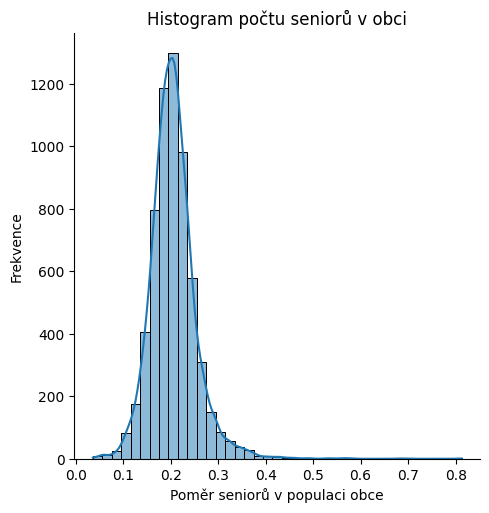

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vytvoření histogramu
sns.displot(vira_vek, x="Poměr_důchodců", binwidth=0.02, kde=True)

# Přidání názvů a popisků
plt.title("Histogram počtu seniorů v obci")
plt.xlabel("Poměr seniorů v populaci obce")
plt.ylabel("Frekvence")

# Zobrazení histogramu
plt.show()

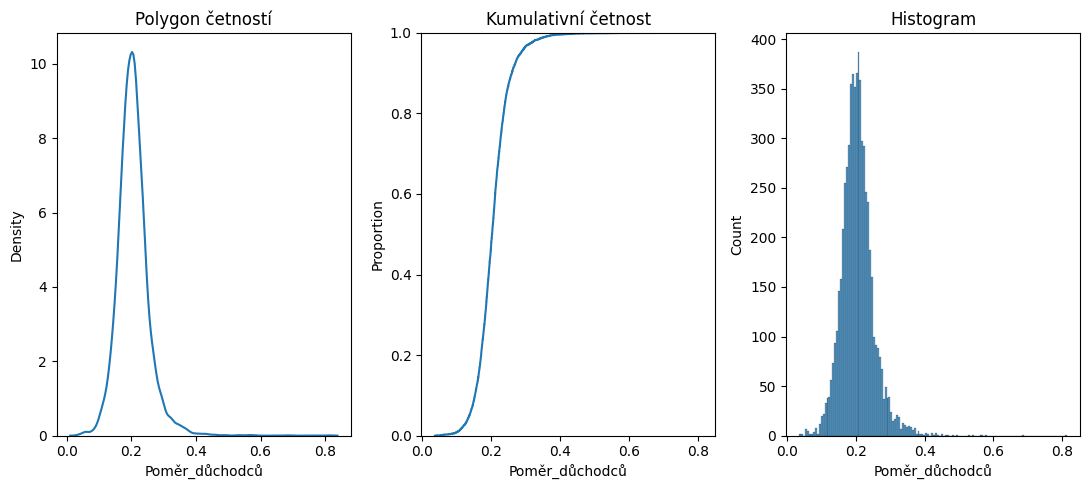

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(11, 5))

sns.kdeplot(data=vira_vek, x="Poměr_důchodců", ax=axes[0])
axes[0].set_title("Polygon četností")

sns.ecdfplot(data=vira_vek, x="Poměr_důchodců", ax=axes[1])
axes[1].set_title("Kumulativní četnost")

sns.histplot(data=vira_vek, x="Poměr_důchodců", ax=axes[2])
axes[2].set_title("Histogram")

plt.tight_layout()
plt.show()

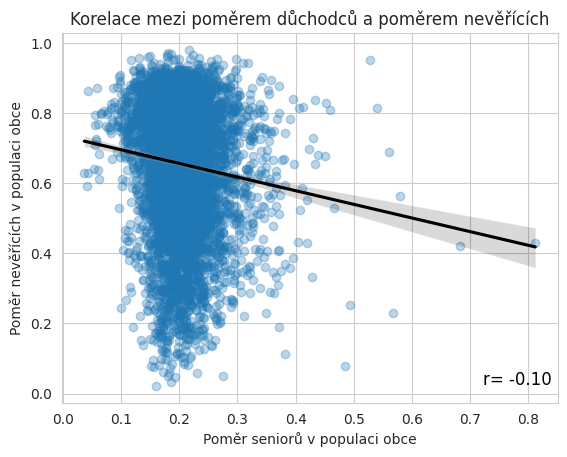

In [31]:
sns.regplot(data=vira_vek, x="Poměr_důchodců", 
            y="Poměr_nevěřících", scatter_kws={'alpha':0.3},
            line_kws={"color": "black"})

plt.title("Korelace mezi poměrem důchodců a poměrem nevěřících")
plt.xlabel("Poměr seniorů v populaci obce")
plt.ylabel("Poměr nevěřících v populaci obce")

correlation = vira_vek['Poměr_důchodců'].corr(vira_vek['Poměr_nevěřících'])
plt.text(0.85, 0.05, f'r= {correlation:.2f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, color='black')

plt.show()

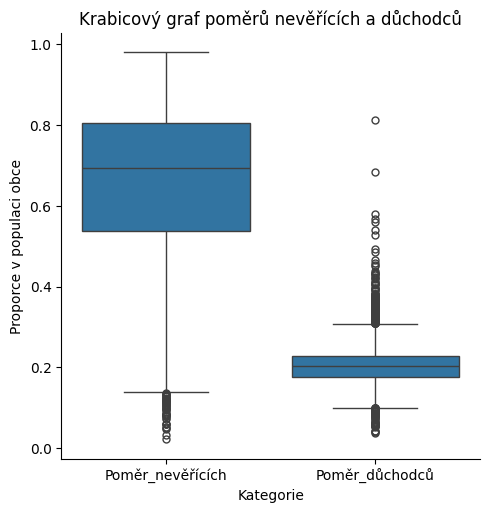

In [19]:
vira_vek_transformed = vira_vek.reset_index().melt(id_vars="uzemi_kod", var_name="Kategorie", value_name="Poměr")

sns.catplot(data=vira_vek_transformed, x="Kategorie", y="Poměr", kind="box")

plt.title("Krabicový graf poměrů nevěřících a důchodců")
plt.xlabel("Kategorie")
plt.ylabel("Proporce v populaci obce")
plt.show()

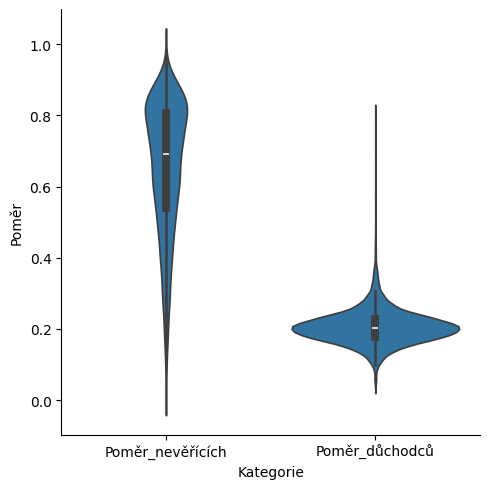

In [20]:
sns.catplot(data=vira_vek_transformed, x="Kategorie", y="Poměr", kind="violin")
plt.show()

pocetdeti_txt
0            993155
1            822489
2           1906429
3            543154
4            108271
5 a více      41858
Name: hodnota, dtype: int64


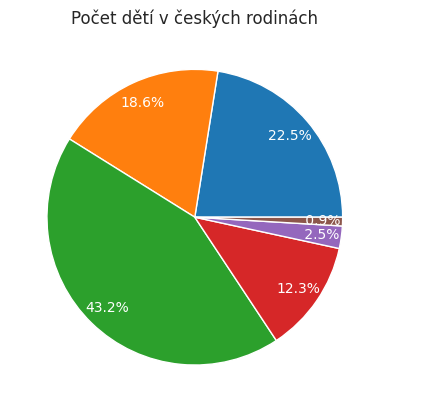

In [29]:
velikost_rodin = děti_filtered.groupby('pocetdeti_txt')['hodnota'].sum()
print(velikost_rodin)

sns.set_style("whitegrid")
plt.pie(velikost_rodin, labels=velikost_rodin.index, autopct='%4.1f%%', 
        pctdistance=0.85, textprops={'color':"w"})
plt.title("Počet dětí v českých rodinách")
plt.show()

In [21]:
děti = pd.read_csv("sldb2021_pocetdeti.csv")
děti_filtered = děti.dropna()
děti_filtered = děti_filtered[ děti_filtered['pocetdeti_txt'] != 'Nezjištěno' ]
děti_filtered = děti_filtered[ děti_filtered["uzemi_cis"] == 43 ]

velké_rodiny = děti_filtered.groupby('uzemi_kod').agg(
    celkem=('hodnota', 'sum'),
    děti_3=('hodnota', lambda x: \
        x[(děti_filtered.loc[x.index, 'pocetdeti_txt'] == '3') \
        | (děti_filtered.loc[x.index, 'pocetdeti_txt'] == '4') \
        | (děti_filtered.loc[x.index, 'pocetdeti_txt'] == '5 a více') \
        ].sum()),
)

velké_rodiny['Poměr_velkých_rodin'] = velké_rodiny['děti_3'] / velké_rodiny['celkem']

velké_rodiny = velké_rodiny.drop(columns=["celkem",	"děti_3"])

In [22]:
byty = pd.read_csv("sldb2021_byty_mistnosti.csv")
byty_filtered = byty
byty_filtered = byty_filtered[ byty_filtered['ukaz_txt'] == 'Průměrný počet obytných místností na 1 byt' ]
byty_filtered = byty_filtered[ byty_filtered['uzemi_cis'] == 43 ]

byty_filtered = byty_filtered.drop(columns=["idhod", "ukaz_kod", "mistnosti_cis", "mistnosti_kod", "uzemi_cis", "sldb_rok",	"sldb_datum",	"ukaz_txt",	"mistnosti_txt"])

In [23]:
vira_vek_deti = pd.merge(vira_vek, velké_rodiny, how='inner', on='uzemi_kod')
final = pd.merge(vira_vek_deti, byty_filtered, how='inner', on='uzemi_kod')
final = final.rename(columns={"hodnota": "průměrný počet místností na byt"})
final.head()
final = final.drop(columns=["uzemi_kod", "uzemi_txt"])

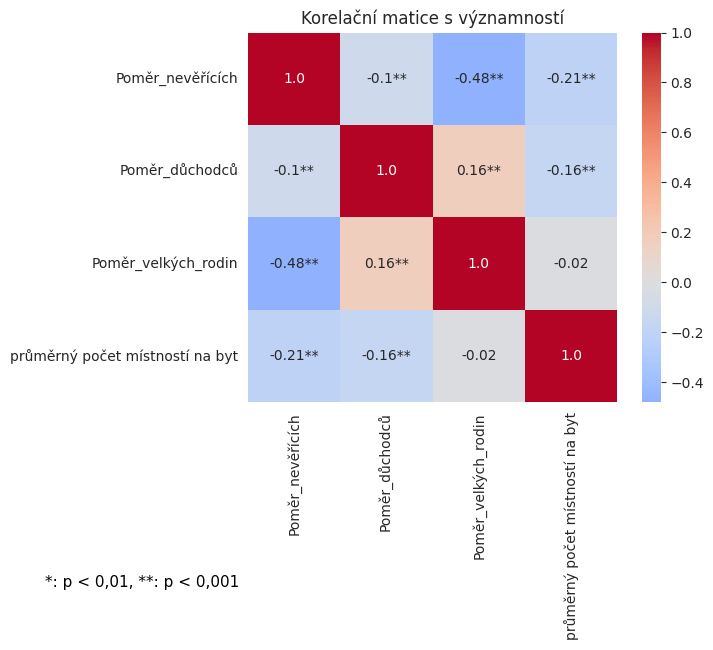

In [28]:
import numpy as np
from scipy.stats import pearsonr

def calculate_pvalues(df):
    pvalues = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                _, p = pearsonr(df[col1], df[col2])
                pvalues.loc[col1, col2] = p
            else:
                pvalues.loc[col1, col2] = np.nan 
    return pvalues

p = calculate_pvalues(final)
correlation_matrix = final.corr()

anotace = correlation_matrix.round(2).astype(str)
for i in range(len(anotace.columns)):
    for j in range(len(anotace.columns)):
        if p.iloc[i, j] < 0.001:
            anotace.iloc[i, j] += '**'
        elif p.iloc[i, j] < 0.01:
            anotace.iloc[i, j] += '*'

sns.heatmap(correlation_matrix, annot=anotace, cmap="coolwarm", square=True, fmt="", center=0)
plt.title("Korelační matice s významností")
plt.text(-0.55, -0.5, '*: p < 0,01, **: p < 0,001', 
         transform=plt.gca().transAxes, 
         fontsize=11, color='black')
plt.savefig("matrix.png")

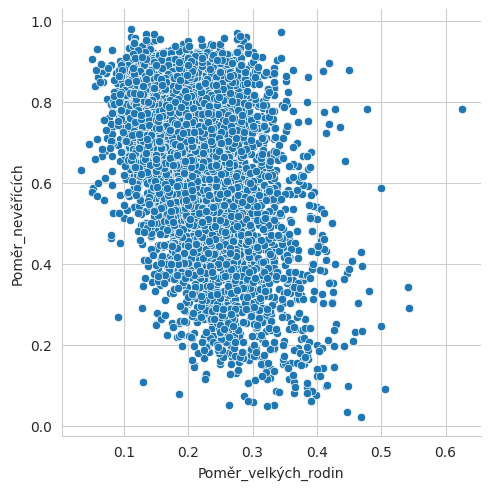

In [30]:
sns.relplot(
    data=final, x="Poměr_velkých_rodin", y='Poměr_nevěřících', kind="scatter"
)

plt.show()